## 自编程实现一个感知机
> 问题描述： <br> 已知训练集D，其正实例点x1=(3, 3), x2=(4, 3), 负实例点x3=(1, 1)
>> 用Python自编程实现感知机模型，对训练数据集进行分类， 并对比误分类点选择次序不同对最终结果的影响
>
>下面编程实现， 基于对象编程，顺便复习一下Python对象编程的知识
>
>附加： 感知机的对偶形式的实现
>
>原始感知机算法和对偶感知机算法的区别和应用：
>> 原始感知机算法的计算量是和X样本的特征数量成正比的，所以如果X样本维度d比较大的时候，推荐用对偶算法<br>
对偶感知机算法的计算量适合X样本的样本数量成正比的，所以如果X样本数量N比较大的时候，推荐用原始算法<br>
Ps：具体推导见感知机这一节课的笔记。

### 1. 导入相应的包

In [173]:
import numpy as np 
import matplotlib.pyplot as plt

### 2. 定义可视化结果的函数
>思路：
>>(1) 生成分离超平面上的两点， 可以是与坐标轴相交的点<br>
(2) 绘制训练集的散点图（由于一开始产生结果随机，所以这儿遍历数据集，根据数据集标签进行绘制）<br>
(3）绘制超平面<br>
(4) 设置坐标

In [488]:
def visual_result(X, y, w, b):
    """
        可视化最终结果的函数
    Args:
        X: 训练集样本特征
        y: 训练集样本标签
        w, b： 参数
    
    """
    # 生成分离超平面上的两点
    if w[1] != 0 and w[0] != 0:
        X_new = np.array([[0], [6]])    #  X_new 是两行一列的数组   选定了两个点，就是与坐标轴的交点的x
        y_predict = (-b-(w[0]*X_new))/ w[1]    # 因为那个模型是w1 x1 + w2 x2 + b = 0 所以， 选定了x1的两个点， x2 = -b - w[1]x[1] / w[2]
    elif w[0] != 0:
        X_new = np.array([[-b/w[0]], [-b/w[0]]])      # 斜率没有的情况
        y_predict = [[0], [6]]
    else:
        X_new = [[0], [6]]                       # 斜率等于0的情况
        y_predict = np.array([[-b/w[1]], [-b/w[1]]])
        
    # 绘制训练数据集的散点图
    y = np.array(y).reshape((1, X.shape[0]))
    for i in range(X.shape[0]):
        if y[0][i] == 1:
            plt.plot(X[i][0], X[i][1], "g*", label="1")
        else:
            plt.plot(X[i][0], X[i][1], "rx", label="-1")
    #plt.plot(X[:2, 0], X[:2, 1], "g*", label="1")    #  画正样本  标签是为了下面的图例
   # plt.plot(X[2:, 0], X[2:, 0], "rx", label="-1")   # 画负样本
    
    # 绘制分离超平面
    plt.plot(X_new, y_predict, "b-", label="split line")
    
    # 设置两坐标轴起始值
    plt.axis([0, 6, 0, 6])
    
    # 设置坐标轴标签
    plt.xlabel('x1')
    plt.ylabel('x2')
    
    # 显示图例
    plt.legend()
    
    # 显示图像
    plt.show()

### 2. 创建感知机模型类和相应的感知机对象

>2.1 创建原始形式的感知机模型和对象(class OriPerception 和 def CreateOriPerception)<br>
2.2 创建对偶形式的感知机模型和对象(class DualityPerception 和 def CreateDualityPerception)

### 2.1 创建原始形式的感知机模型和对象
>回顾一下原始形式感知机模型算法(伪代码）：
>> 输入： 训练数据集T = {(x1, y1), ....(xn, yn)}<br>
（1）选出初始值w0, b0以及学习率η<br>
（2）在训练数据集中选取数据(x1, y1)<br>
（3）如果yi(w.xi+b) <=0:<br>
    &emsp;&emsp;&emsp;&emsp;&emsp;w = w + ηyixi<br>
    &emsp;&emsp;&emsp;&emsp;&emsp;b = b + ηyi<br>
（4）转至（2）， 直到训练集中没有误分类点

In [511]:
class OriPerception:
    """定义原始感知机类"""
    
    def __init__(self):              # 定义属性，并且初始化, self必须有
        self.w = None
        self.b = 0
        self.l_rate = 0.3            # 这里可以修改学习率
    
    # 定义训练感知机的函数
    def train(self, X_train, y_train, visual=False):
        """定义训练原始感知机的函数
        
        Args:
            X_train:  传过来的训练集特征X(矩阵的形式)
               eg:  X_train = [[x11, x12], [x21, x22], [x31, x32]]
            y_train: 对应的标签y（一维向量的形式）
               eg:  y_train = [1, 1, -1]
        
        """
        self.w = np.zeros(X_train.shape[1])    # 用样本点的特征数更新初始化w, 如x1=(3, 3), 有两个特征， 则self.w=[0, 0]
        i = 0
        while i < X_train.shape[0]:
            X = X_train[i]
            y = y_train[i]
            if y * (np.dot(self.w, X) + self.b) <= 0:
                self.w = self.w + self.l_rate * np.dot(y, X)
                self.b = self.b + self.l_rate * y
                i = 0         # 如果是误分类点，调整参数，从头进行检测
            else:
                i += 1
            
            if visual:
                visual_result(X_train, y_train, self.w, self.b)      # 分类过程中可以将结果可视化，但是结果就很繁琐，建议debug用

# 创建原始感知机模型对象
def CreateOriPerception(X_train, y_train):
    """
        定义创建原始感知机的函数
        
        Args:
            X_train:  传过来的训练集特征X(矩阵的形式)
               eg:  X = [[x11, x12], [x21, x22], [x31, x32]]
            y_train: 对应的标签y（一维向量的形式）
               eg:  y = [1, 1, -1]
        
    """
    perception = OriPerception()
    perception.train(X_train, y_train)
    print('W:', perception.w)
    print('b:', perception.b)
    visual_result(X_train, perception.w, perception.b)

### 2.2 创建对偶形式的感知机模型和对象
>回顾一下对偶形式感知机模型的算法（伪代码）：
>>输入： 训练数据集T = {(x1, y1), ....(xn, yn)}<br>
（1）选出初始值α,b以及学习率η<br>
（2）在训练数据集中选取数据(xi, yi)<br>
（3）如果yi(∑αjyjxj. xi + b) <= 0:<br>
     αi = αi + η<br>
     b = b + ηyi<br>
（4）转至（2）， 直到训练集中没有误分类点

In [527]:
class DualityPerception:
    """定义对偶感知机类"""    
    
    def __init__(self):            # 定义属性，并且初始化, self必须有
        self.a = None
        self.b = 0
        self.l_rate = 0.3            # 这里可以修改学习率
    
    # 定义训练感知机的函数
    def ComputeGram(self, X_train):
        """
         计算Gram矩阵（当然还有简便的计算方法）
         
         Args: 
             X_train: 获取训练集的数据特征 
        
        return：
            Gram： 得到的Gram矩阵， 即每个训练样本两两内积组成
        """
        Gram = []

        for j in range(X_train.shape[0]):
             for k in range(X_train.shape[0]):
                temp = np.sum(X_train[j,:] * X_train[k, :])
                Gram.append(temp)
        Gram = np.array(Gram).reshape((X_train.shape[0], X_train.shape[0]))
        
        return Gram
    
    def train(self, X_train, y_train, visual=False):
        """
            定义训练对偶感知机的函数
        
        Args:
            X_train:  传过来的训练集特征X(矩阵的形式)
               eg:  X_train = [[x11, x12], [x21, x22], [x31, x32]]
            y_train: 对应的标签y（一维向量的形式）
               eg:  y_train = [1, 1, -1]
        """
        self.a = np.zeros([1, X_train.shape[0]]) # 用样本点的个数更新初始化a, 如有x1,x2,x3 三个样本点， 则self.a=[0, 0, 0] 和原始感知机不同
        i = 0
        #Gram = self.ComputeGram(X_train)
        Gram = np.dot(X_train, X_train.T)            # 这个是计算Gram矩阵的简单形式， 建议用这个
        while i < X_train.shape[0]:
            X = X_train[i]
            y = y_train[i]
            sum1 = 0
            j = 0
            while j < X_train.shape[0]:            # 计算累加和
                sum1 += (self.a[0][j] * y_train[j] * Gram[j][i])
                j += 1
            sum1 += self.b
            if y * sum1 <= 0:
                self.a[0][i] = self.a[0][i] + self.l_rate
                self.b = self.b + self.l_rate * y
                i = 0                            # 如果是误分类点，调整参数，从头进行检测
            else:
                i += 1
            
            if visual:
                visual_result(X_train, y_train, self.w, self.b)           # 分类过程中可以将结果可视化，但是结果就很繁琐，建议debug用

def CreateDualityPerception(X_train, y_train):
    """
     定义创建对偶感知机的函数

    Args:
        X_train:  传过来的训练集特征X(矩阵的形式)
            eg:  X_train = [[x11, x12], [x21, x22], [x31, x32]]
        y_train: 对应的标签y（一维向量的形式）
            eg:  y_train = [1, 1, -1]

    """
    perception = DualityPerception()
    perception.train(X_train, y_train)
    print('a:', perception.a)
    y_train = np.array(y_train).reshape((1, X_train.shape[0]))   #  把y_train从1一维列表变成二维矩阵
    w = np.sum(perception.a.T * X_train * y_train.T, axis=0)
    print('W:', w)
    print('b:', perception.b)
    visual_result(X_train,y_train, w, perception.b)
    

### 4. 主函数
> 1. 构造训练集<br>
>2. 构建感知机对象， 对数据集进行训练<br> 
>3. 可视化结果

In [522]:
def main():
    # 构造训练集, 采用随机生成的方式
    orig_data = np.array([[3, 3, 1], [4, 3, 1], [1, 1, -1]])
    row = np.random.permutation(orig_data.shape[0])    #  随机打乱行号
    new_data = orig_data[row, :] 
    X_train = new_data[:, 0:2]
    Y_train = new_data[:, 2:]
    y_train = Y_train.T[0, :]
    
    print("数据集信息：")
    print('X_train', X_train)
    print('y_train', y_train)
    print()
    # 构建感知机对象， 对数据集进行训练
    print('************************************************************')
    print('在原始感知机下的结果：')
    CreateOriPerception(X_train, y_train)
    print()

    print('************************************************************')
    print('在对偶感知机下的结果：')
    CreateDualityPerception(X_train, y_train)
    

数据集信息：
X_train [[3 3]
 [4 3]
 [1 1]]
y_train [ 1  1 -1]

************************************************************
在原始感知机下的结果：
W: [0.3 0.3]
b: -0.8999999999999999


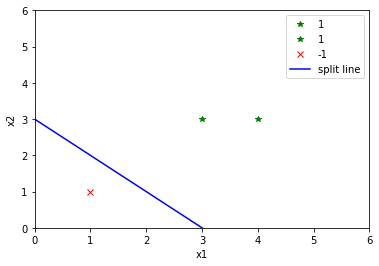


************************************************************
在对偶感知机下的结果：
a: [[0.6 0.  1.5]]
W: [0.3 0.3]
b: -0.8999999999999999


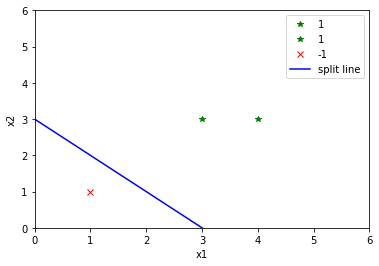

In [528]:
if __name__ == "__main__":
    main()

###  总结和回顾
>通过这次自己实现感知机模型，学到了Python的一些知识，下面总结回顾一下：
>>1. 面向对象编程的好处就是结构清晰，代码分离程度高，类的对象声明与定义要会，类中的函数，初始化函数不用手动调用，建立对象后自动调用，初始化属性参数， 类中的其他函数定义的时候，形参必须先写生self， 以方便调用自己的成员。<br>
2. 对偶形式的模型中，Gram矩阵的计算， 有简便方法， 看下面整理<br>
3. Python中的错误"'list' object has no attribute 'reshape'"  列表和一维数组是不一样的，不能把列表当做一维数组使用

#### 1. 看如何把一个矩阵行向量随机打乱

In [546]:
"""
对numpy.array重新排列：
    numpy.random.shuffle(x)：修改本身，打乱顺序
    numpy.random.permutation(x)：返回一个随机排列
"""

orig_data = np.array([[3, 3, 1], [4, 3, 1], [1, 1, -1]])
row = np.random.permutation(X_train.shape[0])    #  随机打乱行号
new_data = orig_data[row, :] 
X_train = new_data[:, 0:2]
Y_train = new_data[:, 2:]
Y_train = Y_train.T[0, :]

print(X_train)
print(Y_train)



[[4 3]
 [1 1]
 [3 3]]
[ 1 -1  1]


####  2. 感知机学习算法的对偶形式，如何计算Gram矩阵
> 第一种方式： 写一个循环遍历样本，两两内积<br>
第二种方式： 直接np.dot()

In [547]:
# 第一种方式： 基于for循环
def ComputeGram(X_train):
        Gram = []

        for j in range(X_train.shape[0]):
             for k in range(X_train.shape[0]):
                temp = np.sum(X_train[j,:] * X_train[k, :])
                Gram.append(temp)
       # Gram = Gram.reshape((X_train.shape[0], X_train.shape[0]))  #'list' object has no attribute 'reshape'
        print(Gram)
        Gram = np.array(Gram).reshape((X_train.shape[0], X_train.shape[0]))
        return Gram


X_train=np.array([[3,3],[4,3],[1,1]])
Gram = ComputeGram(X_train)
Gram1 = np.dot(X_train, X_train.T)             # 第二种方式， 直接np.dot()，这个方法好 这个利用矩阵的乘法原理
print(Gram)
print(Gram1)

[18, 21, 6, 21, 25, 7, 6, 7, 2]
[[18 21  6]
 [21 25  7]
 [ 6  7  2]]
[[18 21  6]
 [21 25  7]
 [ 6  7  2]]


####  3. 数组和列表是不一样的
> 编程中，不能将列表当做一维数组来用，列表没有一维数组的相关属性的，所以，要善于运用reshape和np.array()

In [570]:
a = [1, 2, 3, 4, 5, 6, 7, 8, 9]    #  这是一个列表
b = np.array(a)       # 这样才是一维数组

print("list: ", a)
#print(a.T)        # 这个报错   'list' object has no attribute 'T'
print("one dimension array: ", b)
print(b.T)

# 二维的同样如此
d= [[3],[3],[1]]   # 这是二维列表
e = np.array(d)   # 这是二维数组

print('2-D_list: ', d)
print('2-D_array', e)

list:  [1, 2, 3, 4, 5, 6, 7, 8, 9]
one dimension array:  [1 2 3 4 5 6 7 8 9]
[1 2 3 4 5 6 7 8 9]
2-D_list:  [[3], [3], [1]]
2-D_array [[3]
 [3]
 [1]]


#### 4. 看看二维数组行列矩阵定义（易混）

In [575]:
a = np.array([[3,3],[4,3],[1,1]])     # a.shape?    (3, 2)
b = np.array([[3], [3], [1]])     # b.shape?    (3, 1)
c = np.array([[3, 3, 1]] )  # c.shape?     (1, 3)
d = np.array([3, 3, 1])   # e.shape?     (3,)

print('a.shape: ', a.shape)
print('b.shape: ', b.shape)
print('c.shape: ', c.shape)
print('d.shape: ', d.shape)

a.shape:  (3, 2)
b.shape:  (3, 1)
c.shape:  (1, 3)
d.shape:  (3,)


#### 4. 一维数组和二维数组的区别（易混）

In [579]:
a1 = np.random.randn(5, 1)   # a1 啥样？[[-0.91084764] [-1.87714429] [ 0.21182939] [ 1.36758288] [ 0.49590864]]    (5, 1)
a2 = np.random.randn(5)      # a2 啥样？ [-0.9832092   0.02045395 -0.43123666  1.74740311  0.22283969]    (5,)

print(a1, a1.shape)
print(a2, a2.shape)

# 上面的a1和a2区别还是很大的，编程中，往往由于不小心，错把a2当成a1， 导致最终结果错误，这样的结果一般还不好找。
# 所以检查矩阵维度是很有必要的

# reshape 改变维度
a = a2.reshape((5, 1))    #  这个是如果发现维度错了之后，可以变成向量 比较保险  
print(a)

# arrert 检查维度
assert(a2.shape == (5, 1))     #  这样在编程的时候，核对一下是不是你要的维度，如果不是，会报错提醒， 这时候再用上面的reshape函数进行改变

[[-0.42803163]
 [ 0.22987266]
 [-0.45958753]
 [-0.16620036]
 [ 1.22328269]] (5, 1)
[ 0.5543977  -0.53085695  0.70430979  1.20800742 -1.17724776] (5,)
[[ 0.5543977 ]
 [-0.53085695]
 [ 0.70430979]
 [ 1.20800742]
 [-1.17724776]]


AssertionError: 